# Maren's rainmaker

In [12]:
import Pkg; Pkg.add("CairoMakie")

   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [13f3f980] + CairoMakie v0.12.16
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [13]:
using SpeedyWeather, RainMaker
using CairoMakie

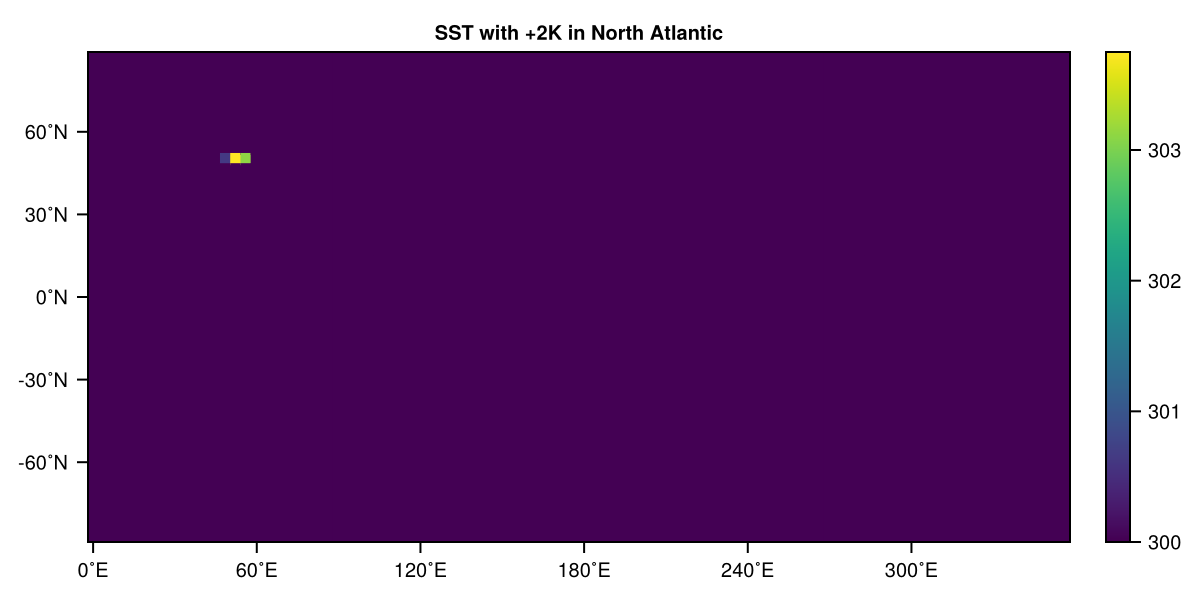

In [104]:
# create a model
spectral_grid = SpectralGrid(trunc=31, nlayers=8)
ocean = AquaPlanet(spectral_grid, temp_equator = 300.0, temp_poles= 300.0)
model = PrimitiveWetModel(spectral_grid; ocean)

# add the rain gauge as callback
rain_gauge = RainGauge(spectral_grid, lond=-1.25, latd=51.75)
add!(model, rain_gauge)

simulation = initialize!(model)
set!(model)
set!(simulation, humid=0.18)
set!(simulation, sea_surface_temperature=(λ, φ) -> (50 < φ < 53) && (50 < λ < 60) ? 5 : 0, add=true)
sst = simulation.prognostic_variables.ocean.sea_surface_temperature

heatmap(sst, title="SST with +2K in North Atlantic")

In [105]:
# run the simulation
#simulation = initialize!(model)
run!(simulation, period=Day(20))

                      Surface relative vorticity [1/s]                      
       ┌────────────────────────────────────────────────────────────┐0.0001 
    90 │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ ┌──┐  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
    ˚N │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  

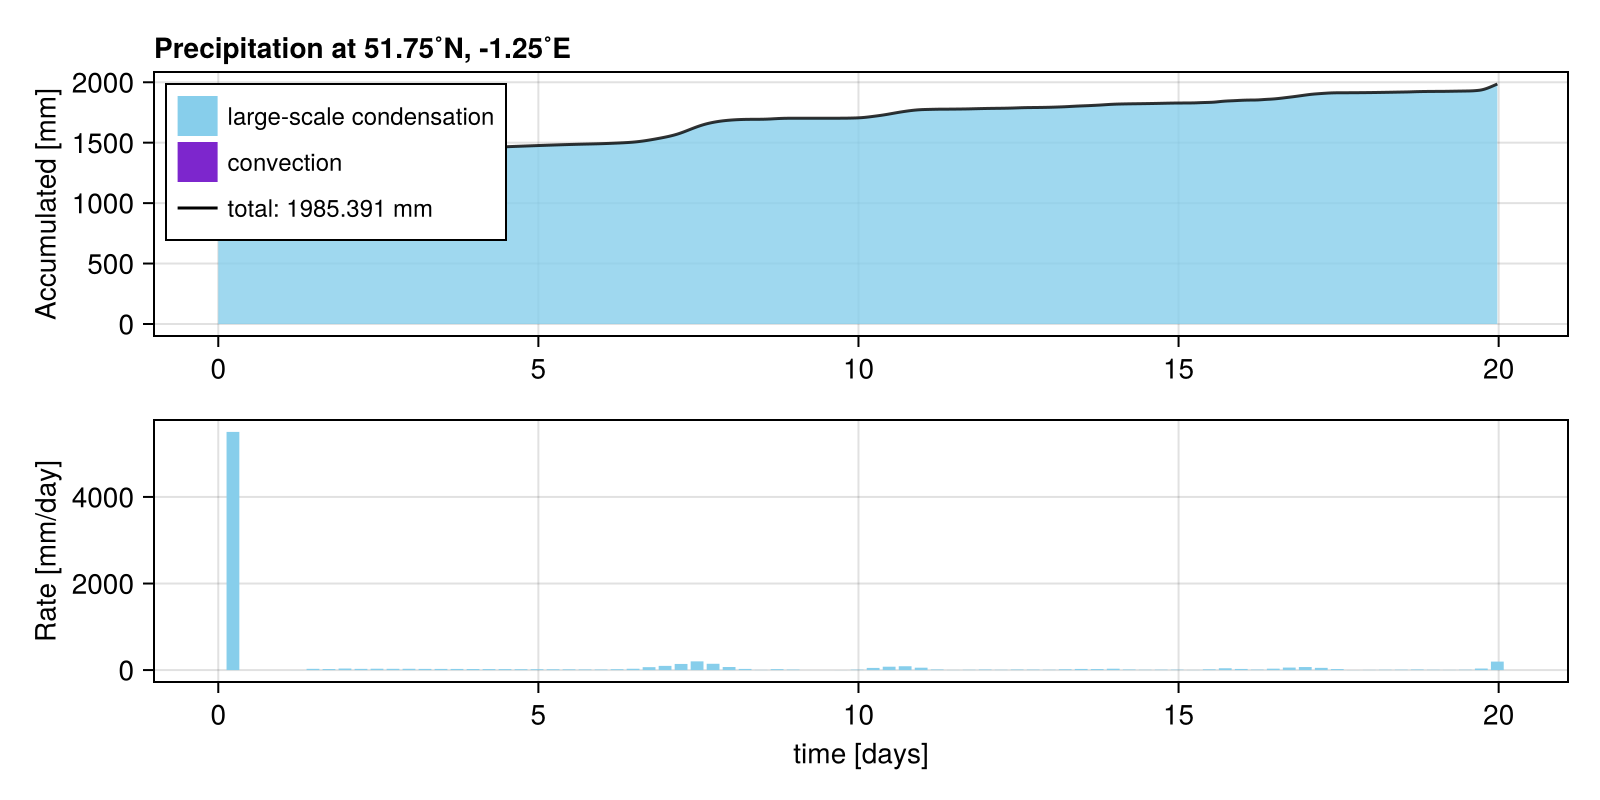

In [106]:
# visualise 
RainMaker.plot(rain_gauge)